# Intro to KNN

## Collect Data

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
list(data.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Separte Features and Targets in X, y

In [3]:
X = data["data"]
y = data["target"]

In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## Train/ Test Splits

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(455, 30)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [7]:
pred_y = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

print(f"Acc at K={k} is {accuracy_score(y_test, pred_y)}")

Acc at K=4 is 0.9385964912280702


In [9]:
ks = [1, 2, 4, 8, 16, 32, 64, 455]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    print(f"Acc at K={k} is {accuracy_score(y_test, pred_y)}")

Acc at K=1 is 0.9298245614035088
Acc at K=2 is 0.9298245614035088
Acc at K=4 is 0.9385964912280702
Acc at K=8 is 0.956140350877193
Acc at K=16 is 0.9649122807017544
Acc at K=32 is 0.9473684210526315
Acc at K=64 is 0.9473684210526315
Acc at K=455 is 0.6228070175438597


## Plot the error, plot the metric (accuracy)

In [10]:
import numpy as np
# import matplotlib.pyplot as plt

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Error history
    error_rate.append(np.mean(pred_i != y_test))

In [11]:
import matplotlib.pyplot as plt


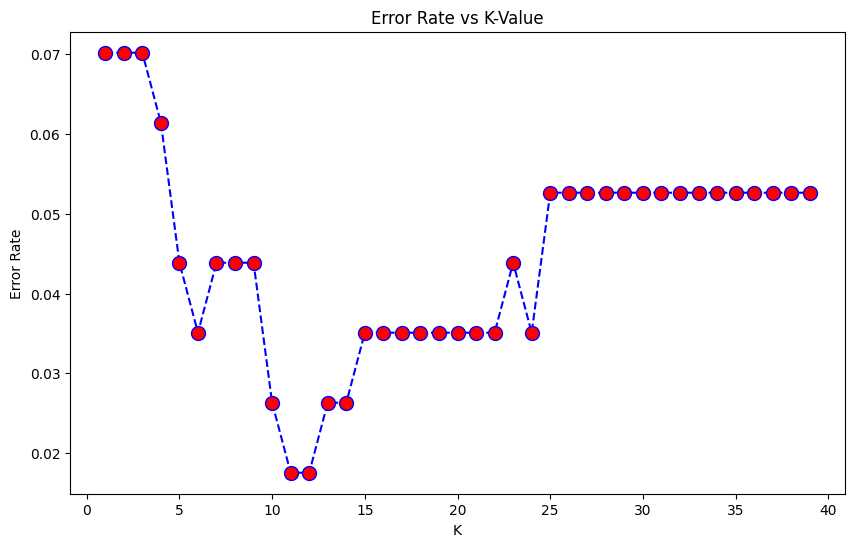

Min Error: 0.017543859649122806, at K=10


In [12]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = "blue",
         linestyle = "dashed",
         marker='o', markerfacecolor="red", markersize=10)

plt.title("Error Rate vs K-Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

print(f"Min Error: {min(error_rate)}, at K={error_rate.index(min(error_rate))}")

### Accuracy

In [13]:
acc = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc.append(accuracy_score(y_test, pred_i))

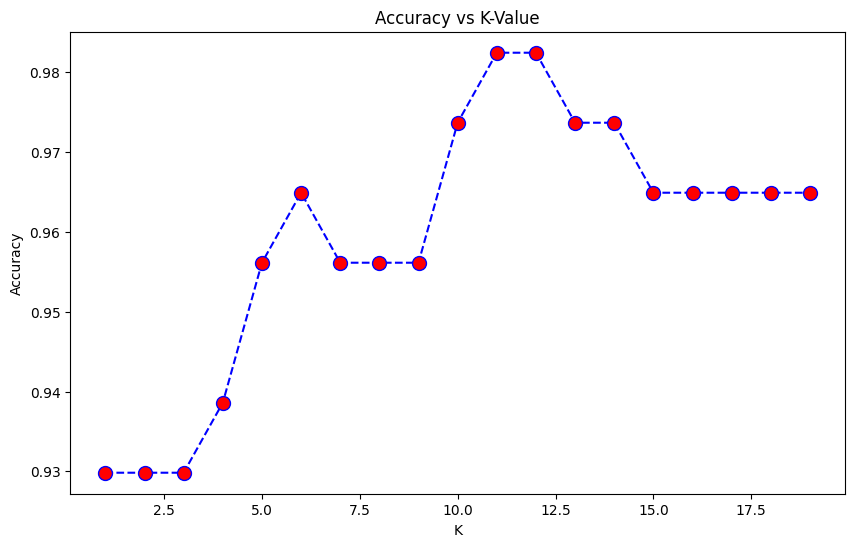

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), acc, color ="blue",
         linestyle = "dashed",
         marker='o', markerfacecolor="red", markersize=10)

plt.title("Accuracy vs K-Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [15]:
print(f"Max Acc: {max(acc)}, at K={acc.index(max(acc))}")

Max Acc: 0.9824561403508771, at K=10
